In [1]:
import numpy
import time
import matplotlib.pyplot as plt

In [15]:
# =======
# log fit
# =======

def log_fit(x, y):
    """
    finds a in y = x**a
    """
    
    not_nan = numpy.logical_not(numpy.isnan(y))
    x = x[not_nan]
    y = y[not_nan]
    
    log2_x = numpy.log2(x)
    log2_y = numpy.log2(y)
    
    coeff = numpy.polyfit(log2_x, log2_y, 1)
    slope = coeff[0]
    
    # Interpolation
    log2_xi = numpy.linspace(log2_x[0], log2_x[-1])
    log2_yi = numpy.polyval(coeff, log2_xi)
    
    xi = 2**(log2_xi)
    yi = 2**(log2_yi)
    
    return slope, xi, yi

# ===
# fit
# ===

def fit(x, y):
    """
    finds a in y = x**a
    """
    
    not_nan = numpy.logical_not(numpy.isnan(y))
    x = x[not_nan]
    y = y[not_nan]
    
    coeff = numpy.polyfit(x, y, 1)
    slope = coeff[0]
    
    # Interpolation
    xi = numpy.linspace(x[0], x[-1])
    yi = numpy.polyval(coeff, xi)
    
    xi = 2**(xi)
    yi = 2**(yi)
    
    return slope, xi, yi

In [5]:
n = 2**numpy.arange(10, 14)
t = numpy.zeros((n.size, ))
repeat = 2

for i in range(n.size):
    A = numpy.random.randn(n[-1], n[i])
    b = numpy.random.randn(n[i])
    t0 = time.process_time()
    for j in range(repeat):
        #x = numpy.linalg.solve(A, b)
        B = A @ A.T
    t[i] = (time.process_time() - t0) / repeat

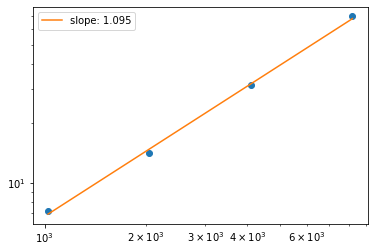

In [18]:
start = 0
slope, ni, ti = log_fit(n[start:], t[start:])
plt.plot(n, t, 'o')
plt.plot(ni, ti, '-', label='slope: %0.3f' % slope)
plt.xscale('log')
plt.yscale('log')
plt.legend()